In [12]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from methods.metrics import *

pd.set_option('display.max_columns', None)
%matplotlib inline

In [13]:
mean_field_sims_paths = './data/simulations_outputs/mean_field_vis_sims_actionTrue_dataTrue_2023-03-30.csv'
df_vis = pd.read_csv(mean_field_sims_paths)
model = ['update_schedule', 'factorisation', 'evidence_weight']
df_vis['model'] = df_vis['update_schedule'] + "_" + df_vis['factorisation'] + "_" + df_vis['evidence_weight'].astype(str)
df_vis = add_dampened_tag(df_vis)

lc_discrete_att_sims_paths = './data/simulations_outputs/LC_discrete_att_&_att_sims_actionTrue_dataTrue_2023-04-01.csv'
df_lc_att = pd.read_csv(lc_discrete_att_sims_paths)
model = ['evidence_weight']
df_lc_att['model'] = df_lc_att['internal_state'] + "_" + df_lc_att['evidence_weight'].astype(str)
df_lc_att = add_dampened_tag(df_lc_att)

lc_discrete_sims_paths = './data/simulations_outputs/LC_discrete_&_1_sims_actionTrue_dataTrue_2023-04-01.csv'
df_lc = pd.read_csv(lc_discrete_sims_paths)
model = ['evidence_weight']
df_lc['model'] = df_lc['internal_state'] + "_" + df_lc['evidence_weight'].astype(str)
df_lc = add_dampened_tag(df_lc)

normative_sims_paths = './data/simulations_outputs/normative_&_1_sims_actionTrue_dataTrue_2023-04-02.csv'
df_normative = pd.read_csv(normative_sims_paths)
model = ['evidence_weight']
df_normative['model'] = df_normative['internal_state'] + "_" + df_normative['evidence_weight'].astype(str)
df_normative = add_dampened_tag(df_normative)

df_classic = pd.concat([df_lc_att.drop(['decay_rate'], axis=1), df_lc, df_normative], ignore_index=True)

/home/vbtesh/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
generic_trials = ['ccause', 'collider', 'confound', 'chain', 'dampened']
df_vis_gen = df_vis[df_vis.trial_name.isin(generic_trials)]
df_classic_gen = df_classic[df_classic.trial_name.isin(generic_trials)]

In [21]:
palette = sns.color_palette("Set2")

models_vis = ['omniscient_normative', 'omniscient_local_computations', 'full_local_computations', 'full_normative', 'single_variable_local_computations', 'single_variable_normative']
models_classic = ['LC_discrete_&_1', 'LC_discrete_att_&_att', 'normative_&_1']
models_all = models_vis + models_classic
models_all = df_vis_gen.model.unique().tolist() + df_classic_gen.model.unique().tolist()
palette = sns.color_palette("Set2", n_colors=len(models_all))
def get_colors(xticks, models, palette):
    colors = []
    for i, t in enumerate(xticks):
        for model in models:
            if model in t:
                colors.append(palette[models.index(model)])

    return colors

#len(palette)

## For next variational paper

## Just LC and Normative

In [123]:
cols = df_classic.columns

df_gen_all = pd.concat((df_vis_gen,df_classic_gen), ignore_index=True)

evidence_weights = df_gen_all.evidence_weight.unique()

select_models = [
    *[f'normative_&_1_{evidence_w}' for evidence_w in evidence_weights],
    *[f'LC_discrete_&_1_{evidence_w}' for evidence_w in evidence_weights],
    #*[f'LC_discrete_att_&_att_{evidence_w}' for evidence_w in evidence_weights], 
    #*[f'full_normative_{evidence_w}' for evidence_w in evidence_weights], 
    #*[f'full_local_computations_{evidence_w}' for evidence_w in evidence_weights],
    #*[f'single_variable_normative_{evidence_w}' for evidence_w in evidence_weights],
    #*[f'single_variable_local_computations_{evidence_w}' for evidence_w in evidence_weights],
    *[f'omniscient_normative_{evidence_w}' for evidence_w in evidence_weights], 
    *[f'omniscient_local_computations_{evidence_w}' for evidence_w in evidence_weights]
]

select_models_names = {
    **{f'normative_&_1_{evidence_w}': f'Normative {evidence_w}' for evidence_w in evidence_weights},
    **{f'LC_discrete_&_1_{evidence_w}': f'LC_{evidence_w}' for evidence_w in evidence_weights},
    #**{f'LC_discrete_att_&_att_{evidence_w}': f'LC Inters. {evidence_w}' for evidence_w in evidence_weights}, 
    #**{f'full_normative_{evidence_w}': f'Variational Normative Full Updates Inter. {evidence_w}' for evidence_w in evidence_weights},
    #**{f'full_local_computations_{evidence_w}': f'Variational LC Full Updates Inter. {evidence_w}' for evidence_w in evidence_weights},
    #**{f'single_variable_normative_{evidence_w}': f'Variational Normative Single Var. Inter. {evidence_w}' for evidence_w in evidence_weights},
    #**{f'single_variable_local_computations_{evidence_w}': f'Variational LC Single Var. Inter. {evidence_w}' for evidence_w in evidence_weights},
    **{f'omniscient_normative_{evidence_w}': f'Variational Normative {evidence_w}' for evidence_w in evidence_weights}, 
    **{f'omniscient_local_computations_{evidence_w}': f'Variational LC {evidence_w}' for evidence_w in evidence_weights}
}
select_models_names_noweight = {
    **{f'normative_&_1_{evidence_w}': f'Normative' for evidence_w in evidence_weights},
    **{f'LC_discrete_&_1_{evidence_w}': f'LC' for evidence_w in evidence_weights},
    #**{f'LC_discrete_att_&_att_{evidence_w}': f'LC Inters.' for evidence_w in evidence_weights}, 
    #**{f'full_normative_{evidence_w}': f'Variational Normative Full Updates Inter.' for evidence_w in evidence_weights},
    #**{f'full_local_computations_{evidence_w}': f'Variational LC Full Updates Inter.' for evidence_w in evidence_weights},
    #**{f'single_variable_normative_{evidence_w}': f'Variational Normative Single Var. Inter.' for evidence_w in evidence_weights},
    #**{f'single_variable_local_computations_{evidence_w}': f'Variational LC Single Var. Inter.' for evidence_w in evidence_weights},
    **{f'omniscient_normative_{evidence_w}': f'Variational Normative' for evidence_w in evidence_weights}, 
    **{f'omniscient_local_computations_{evidence_w}': f'Variational LC' for evidence_w in evidence_weights}
}

select_models_labels = [v for v in select_models_names.values()]

df_gen = df_gen_all[df_gen_all.model.isin(select_models)]

df_gen['model_labels'] = df_gen.model.replace(select_models_names)
df_gen['model_labels_noweight'] = df_gen.model.replace(select_models_names_noweight)

select_models_labels = [v for v in select_models_names.values()]
select_models_labels_noweight = df_gen.model_labels_noweight.unique()

df_gen['model_type'] = df_gen.apply(lambda x: get_model_type(x.model, x.internal_state), axis=1).to_list()
df_gen['model_factorisation'] = df_gen.apply(lambda x: get_model_factorisation(x.model, x.internal_state), axis=1).to_list()
df_gen['model_focus'] = df_gen.apply(lambda x: get_model_focus(x.model, x.internal_state), axis=1).to_list()

df_gen['theta_correct'] = df_gen.apply(lambda x: 1 if x.theta_MAP == x.theta or x.model_type == 'Standard' else 0, axis=1)

/tmp/ipykernel_31751/3219999412.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gen['model_labels'] = df_gen.model.replace(select_models_names)
/tmp/ipykernel_31751/3219999412.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gen['model_labels_noweight'] = df_gen.model.replace(select_models_names_noweight)
/tmp/ipykernel_31751/3219999412.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

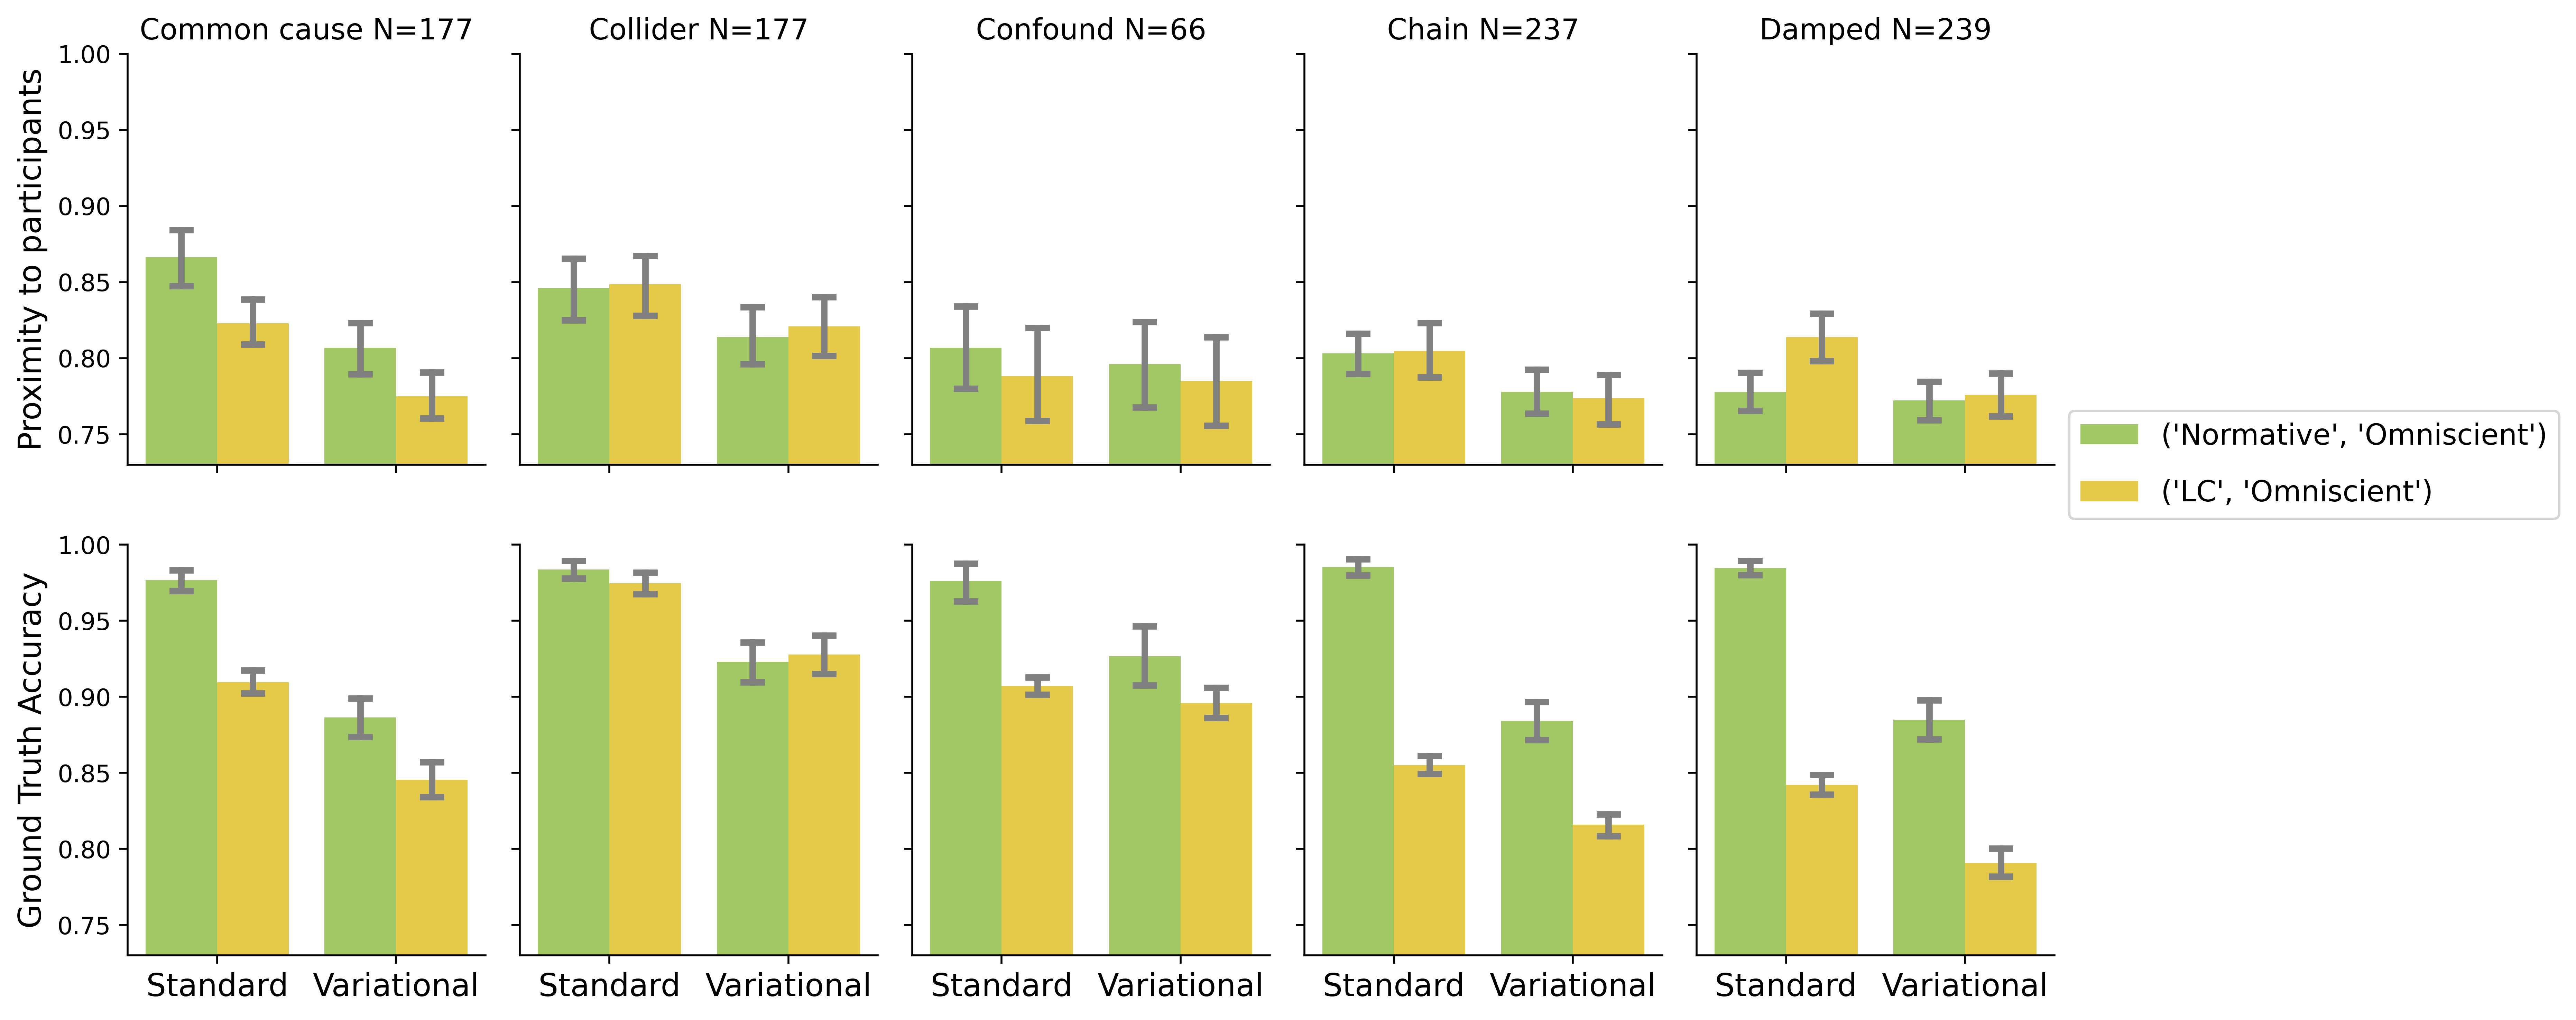

In [124]:
col_features = generic_trials
col_labels = ['Common cause', 'Collider', 'Confound', 'Chain', 'Damped']
col_name = 'trial_name'
row_features = ['judgement_to_weighted_MAP', 'accuracy_weighted']
row_labels = ["Proximity to participants", "Ground Truth Accuracy"]

hue_order = [('Normative', 'Omniscient'), ('LC', 'Omniscient')]


colors = get_colors(np.sort(df_gen.model_labels.unique()), select_models_labels, palette) 
sns.set_palette(colors)

fig, axs = plt.subplots(len(row_features), len(col_features), figsize=(15, 6), dpi=500, sharey=True, sharex=True)

for i, row in enumerate(row_features):
    for j, col in enumerate(col_features):
        #colors = get_colors(np.sort(df_ccn.model.unique()), ccn_models, palette)
        
        #sns.set_palette(colors)

        df_plot_w = df_gen[df_gen[col_name] == col]
        df_plot = df_plot_w[df_plot_w.evidence_weight == 1.0]
        df_plot = df_plot.rename({'model_factorisation':'Factorisation'}, axis=1)
        df_plot = df_plot.rename({'model_focus':'Focus'}, axis=1)

        #colors = get_colors(np.sort(df_plot.model_labels_noweight.unique()), select_models_labels_noweight.tolist(), palette) 
        #sns.set_palette(colors)

        sns.barplot(x='model_type', y=row, hue=df_plot[['Factorisation', 'Focus']].apply(tuple, axis=1), data=df_plot, ax=axs[i, j], ci=95, capsize=.1, errcolor=".5", order=['Standard', 'Variational'], hue_order=hue_order)

        
        if i < len(row_features) - 1:
            axs[i, j].set_xticklabels([], rotation=90)
            axs[i, j].set_xlabel("", rotation=90)
            axs[i, j].set_title(f'{col_labels[j].capitalize()} N={df_plot[df_plot.model == df_plot.model.unique()[0]].shape[0]}', fontsize=12)
            #axs[i, j].legend(fontsize=11)
        else:
            axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), fontsize=13)
            axs[i, j].set_xlabel('')
            axs[i, j].set_title('')            

        if j == 0:
            axs[i, j].set_ylabel(row_labels[i], fontsize=13)
        else:
            axs[i, j].set_ylabel("")

        if j == len(col_features) - 1 and i == 0:
            axs[i, j].legend(labelspacing=1, loc=6, bbox_to_anchor=(1, 0), fontsize=12)
        else:
            axs[i, j].legend([], frameon=False)

        axs[i, j].set_ylim(.73, 1)

        sns.despine(ax=axs[i,j])
        

plt.tight_layout()
plt.savefig('./plots/omniscient_accuracy_results.pdf', format='pdf')
plt.savefig('./plots/omniscient_accuracy_results.png', format='png')
plt.show()

## Plot with models focusing on interventional data
- x = standard/variational
- hue = normative, lc, interfocus

In [185]:
cols = df_classic.columns

df_gen_all = pd.concat((df_vis_gen,df_classic_gen), ignore_index=True)

evidence_weights = df_gen_all.evidence_weight.unique()

select_models = [
    *[f'normative_&_1_{evidence_w}' for evidence_w in evidence_weights],
    *[f'LC_discrete_&_1_{evidence_w}' for evidence_w in evidence_weights],
    *[f'LC_discrete_att_&_att_{evidence_w}' for evidence_w in evidence_weights], 
    #*[f'full_normative_{evidence_w}' for evidence_w in evidence_weights], 
    #*[f'full_local_computations_{evidence_w}' for evidence_w in evidence_weights],
    *[f'omniscient_normative_{evidence_w}' for evidence_w in evidence_weights], 
    *[f'omniscient_local_computations_{evidence_w}' for evidence_w in evidence_weights],
    #*[f'single_variable_normative_{evidence_w}' for evidence_w in evidence_weights],
    *[f'single_variable_local_computations_{evidence_w}' for evidence_w in evidence_weights],
]

select_models_names = {
    **{f'normative_&_1_{evidence_w}': f'Normative {evidence_w}' for evidence_w in evidence_weights},
    **{f'LC_discrete_&_1_{evidence_w}': f'LC_{evidence_w}' for evidence_w in evidence_weights},
    **{f'LC_discrete_att_&_att_{evidence_w}': f'LC Inters. {evidence_w}' for evidence_w in evidence_weights}, 
    #**{f'full_normative_{evidence_w}': f'Variational Normative Full Updates Inter. {evidence_w}' for evidence_w in evidence_weights},
    #**{f'full_local_computations_{evidence_w}': f'Variational LC Full Updates Inter. {evidence_w}' for evidence_w in evidence_weights},
    **{f'omniscient_normative_{evidence_w}': f'Variational Normative {evidence_w}' for evidence_w in evidence_weights}, 
    **{f'omniscient_local_computations_{evidence_w}': f'Variational LC {evidence_w}' for evidence_w in evidence_weights},
    #**{f'single_variable_normative_{evidence_w}': f'Variational Normative Single Var. Inter. {evidence_w}' for evidence_w in evidence_weights},
    **{f'single_variable_local_computations_{evidence_w}': f'Variational LC Single Var. Inter. {evidence_w}' for evidence_w in evidence_weights},
}
select_models_names_noweight = {
    **{f'normative_&_1_{evidence_w}': f'Normative' for evidence_w in evidence_weights},
    **{f'LC_discrete_&_1_{evidence_w}': f'LC' for evidence_w in evidence_weights},
    **{f'LC_discrete_att_&_att_{evidence_w}': f'LC Inters.' for evidence_w in evidence_weights}, 
    #**{f'full_normative_{evidence_w}': f'Variational Normative Full Updates Inter.' for evidence_w in evidence_weights},
    #**{f'full_local_computations_{evidence_w}': f'Variational LC Full Updates Inter.' for evidence_w in evidence_weights},
    **{f'omniscient_normative_{evidence_w}': f'Variational Normative' for evidence_w in evidence_weights}, 
    **{f'omniscient_local_computations_{evidence_w}': f'Variational LC' for evidence_w in evidence_weights},
    #**{f'single_variable_normative_{evidence_w}': f'Variational Normative Single Var. Inter.' for evidence_w in evidence_weights},
    **{f'single_variable_local_computations_{evidence_w}': f'Variational LC Single Var. Inter.' for evidence_w in evidence_weights},
}

select_models_labels = [v for v in select_models_names.values()]

df_gen = df_gen_all[df_gen_all.model.isin(select_models)]

df_gen['model_labels'] = df_gen.model.replace(select_models_names)
df_gen['model_labels_noweight'] = df_gen.model.replace(select_models_names_noweight)

select_models_labels = [v for v in select_models_names.values()]
select_models_labels_noweight = df_gen.model_labels_noweight.unique()

df_gen['model_type'] = df_gen.apply(lambda x: get_model_type(x.model, x.internal_state), axis=1).to_list()
df_gen['model_factorisation'] = df_gen.apply(lambda x: get_model_factorisation(x.model, x.internal_state), axis=1).to_list()
df_gen['model_focus'] = df_gen.apply(lambda x: get_model_focus(x.model, x.internal_state), axis=1).to_list()

df_gen['theta_correct'] = df_gen.apply(lambda x: 1 if x.theta_MAP == x.theta or x.model_type == 'Standard' else 0, axis=1)

/tmp/ipykernel_31751/2882763857.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gen['model_labels'] = df_gen.model.replace(select_models_names)
/tmp/ipykernel_31751/2882763857.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gen['model_labels_noweight'] = df_gen.model.replace(select_models_names_noweight)
/tmp/ipykernel_31751/2882763857.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

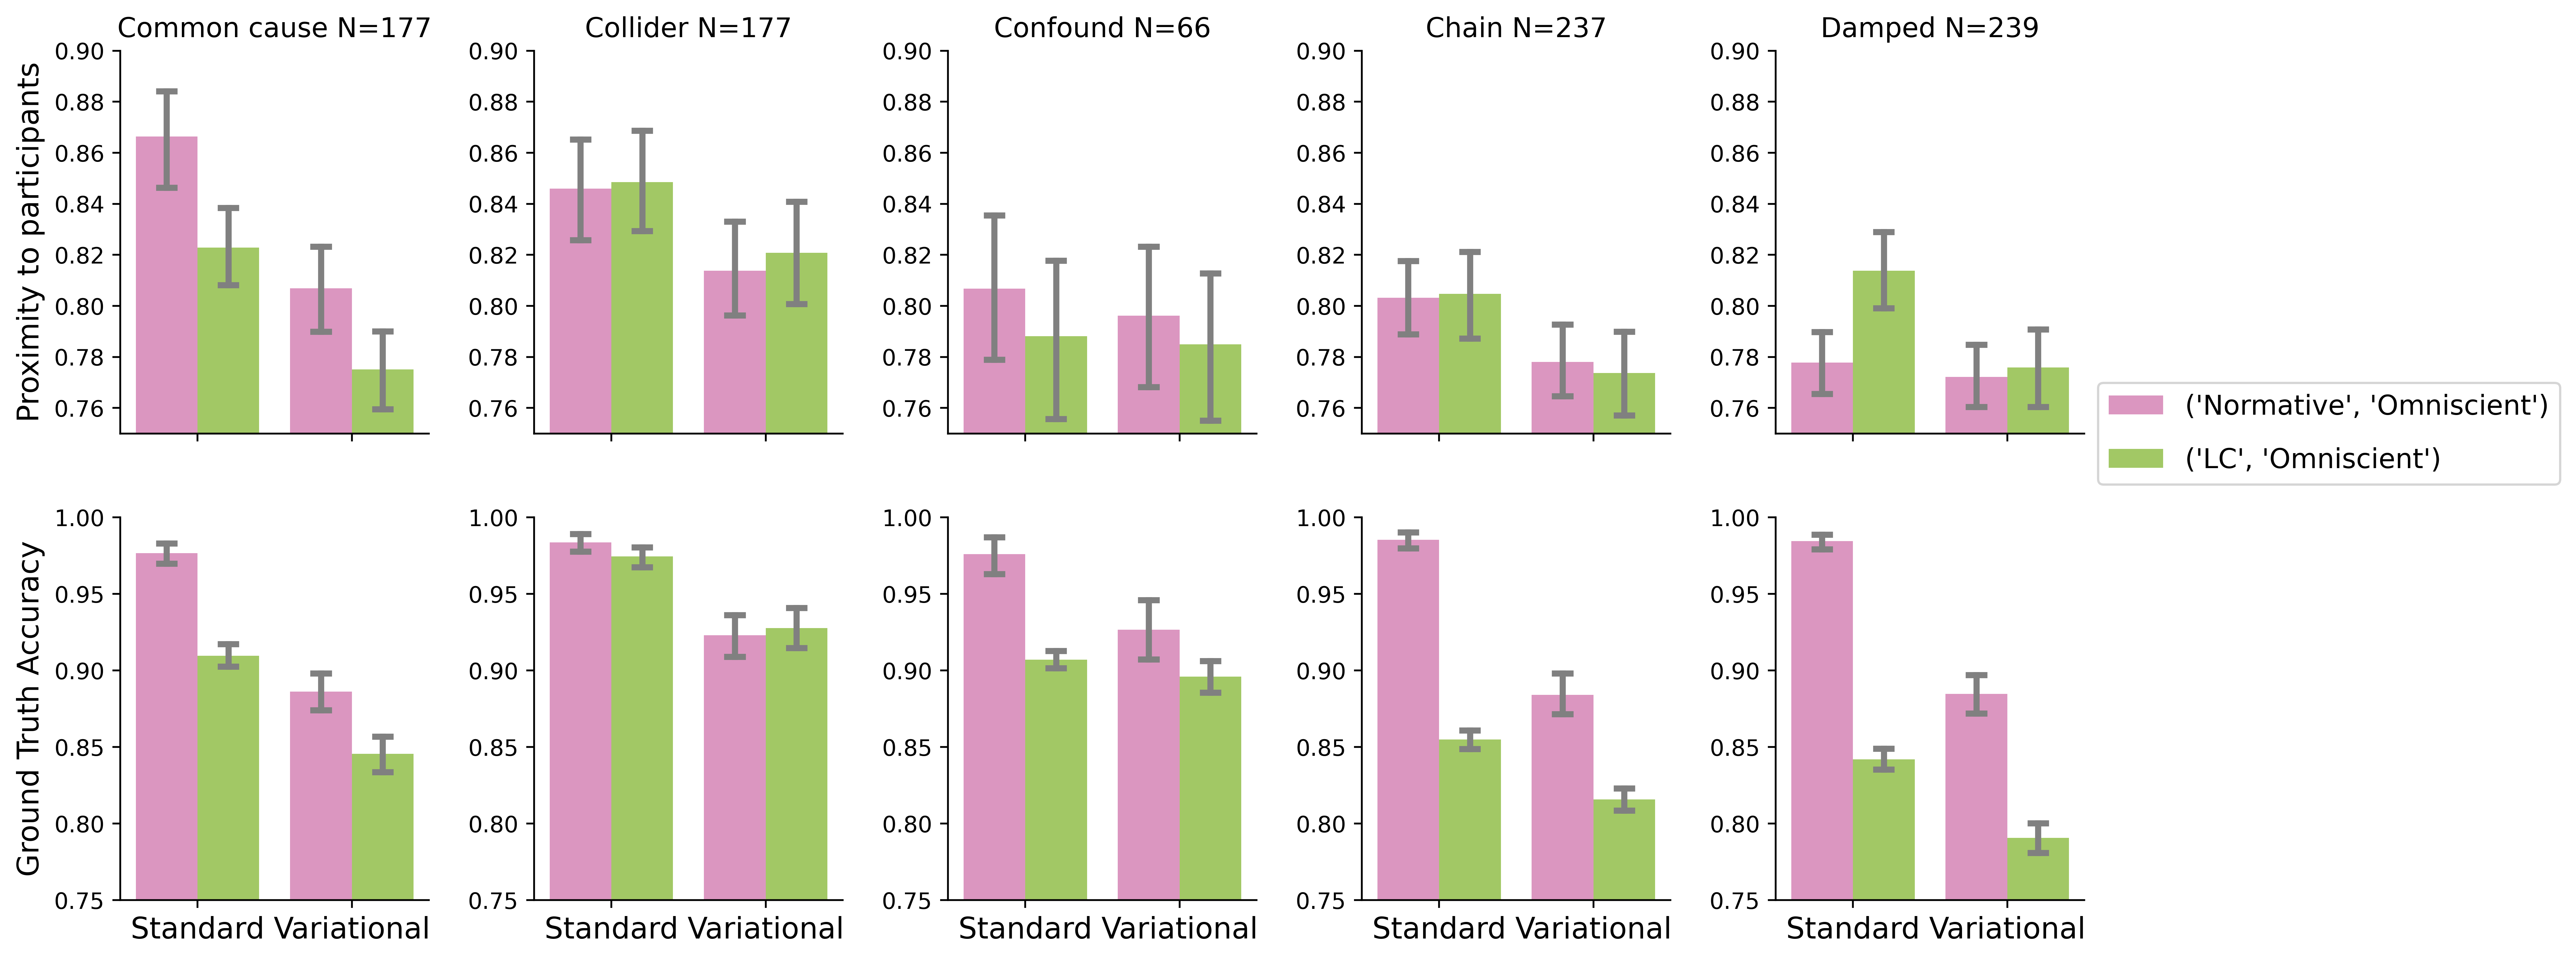

In [186]:
col_features = generic_trials
col_labels = ['Common cause', 'Collider', 'Confound', 'Chain', 'Damped']
col_name = 'trial_name'
row_features = ['judgement_to_weighted_MAP', 'accuracy_weighted']
row_labels = ["Proximity to participants", "Ground Truth Accuracy"]

hue_order = [('Normative', 'Omniscient'), ('LC', 'Omniscient')]


colors = get_colors(np.sort(df_gen.model_labels.unique()), select_models_labels, palette) 
sns.set_palette(colors)

fig, axs = plt.subplots(len(row_features), len(col_features), figsize=(16, 6), dpi=500, sharex=True)

for i, row in enumerate(row_features):
    for j, col in enumerate(col_features):
        #colors = get_colors(np.sort(df_ccn.model.unique()), ccn_models, palette)
        
        #sns.set_palette(colors)

        df_plot_w = df_gen[df_gen[col_name] == col]
        df_plot = df_plot_w[df_plot_w.evidence_weight == 1.0]
        df_plot = df_plot.rename({'model_factorisation':'Factorisation'}, axis=1)
        df_plot = df_plot.rename({'model_focus':'Focus'}, axis=1)

        #colors = get_colors(np.sort(df_plot.model_labels_noweight.unique()), select_models_labels_noweight.tolist(), palette) 
        #sns.set_palette(colors)

        sns.barplot(x='model_type', y=row, hue=df_plot[['Factorisation', 'Focus']].apply(tuple, axis=1), data=df_plot, ax=axs[i, j], ci=95, capsize=.1, errcolor=".5", order=['Standard', 'Variational'], hue_order=hue_order)

        
        if i < len(row_features) - 1:
            axs[i, j].set_xticklabels([], rotation=90)
            axs[i, j].set_xlabel("", rotation=90)
            axs[i, j].set_title(f'{col_labels[j].capitalize()} N={df_plot[df_plot.model == df_plot.model.unique()[0]].shape[0]}', fontsize=12)
            #axs[i, j].legend(fontsize=11)
            axs[i, j].set_ylim(.75, .9) 
        else:
            axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), fontsize=13)
            axs[i, j].set_xlabel('')
            axs[i, j].set_title('')
            axs[i, j].set_ylim(.75, 1)             

        if j == 0:
            axs[i, j].set_ylabel(row_labels[i], fontsize=13)
        else:
            axs[i, j].set_ylabel("")

        if j == len(col_features) - 1 and i == 0:
            axs[i, j].legend(labelspacing=1, loc=6, bbox_to_anchor=(1, 0), fontsize=12)
        else:
            axs[i, j].legend([], frameon=False)

        sns.despine(ax=axs[i,j])
        

plt.tight_layout()
plt.savefig('./plots/omniscient_accuracy_results.pdf', format='pdf')
plt.savefig('./plots/omniscient_accuracy_results.png', format='png')
plt.show()

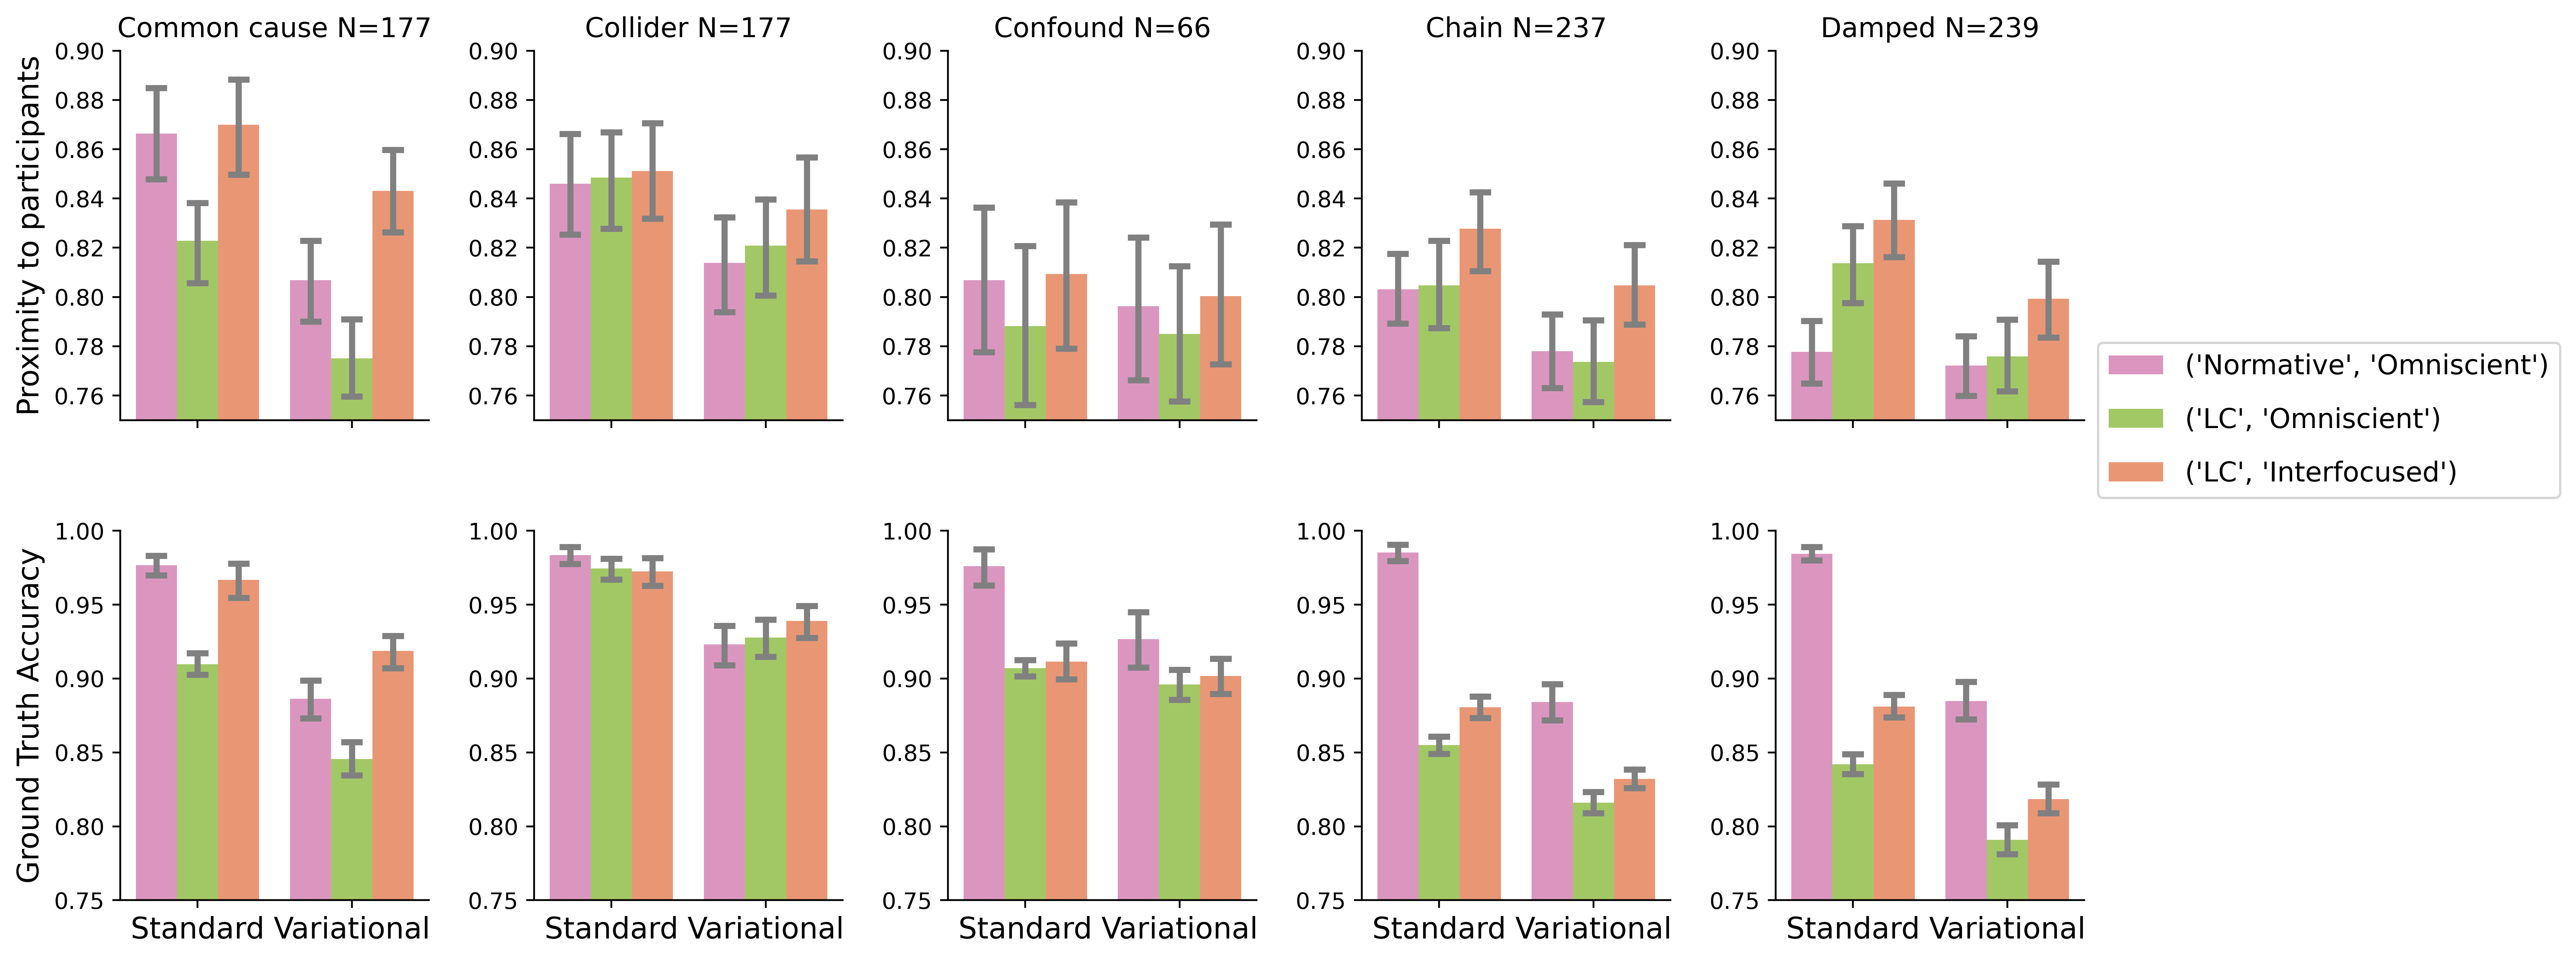

In [187]:
col_features = generic_trials
col_labels = ['Common cause', 'Collider', 'Confound', 'Chain', 'Damped']
col_name = 'trial_name'
row_features = ['judgement_to_weighted_MAP', 'accuracy_weighted']
row_labels = ["Proximity to participants", "Ground Truth Accuracy"]

hue_order = [('Normative', 'Omniscient'), ('LC', 'Omniscient'), ('LC', 'Interfocused')]

#colors = get_colors(np.sort(df_gen.model_labels.unique()), select_models_labels, palette) 
#sns.set_palette(colors)

fig, axs = plt.subplots(len(row_features), len(col_features), figsize=(16, 6), dpi=500, sharex=True)

for i, row in enumerate(row_features):
    for j, col in enumerate(col_features):
        #colors = get_colors(np.sort(df_ccn.model.unique()), ccn_models, palette)
        
        #sns.set_palette(colors)

        df_plot_w = df_gen[df_gen[col_name] == col]
        df_plot = df_plot_w[df_plot_w.evidence_weight == 1.0]
        df_plot = df_plot.rename({'model_factorisation':'Factorisation'}, axis=1)
        df_plot = df_plot.rename({'model_focus':'Focus'}, axis=1)

        #colors = get_colors(np.sort(df_plot.model_labels_noweight.unique()), select_models_labels_noweight.tolist(), palette) 
        #sns.set_palette(colors)

        sns.barplot(x='model_type', y=row, hue=df_plot[['Factorisation', 'Focus']].apply(tuple, axis=1), data=df_plot, ax=axs[i, j], ci=95, capsize=.1, errcolor=".5", order=['Standard', 'Variational'], hue_order=hue_order)

        
        if i < len(row_features) - 1:
            axs[i, j].set_xticklabels([], rotation=90)
            axs[i, j].set_xlabel("", rotation=90)
            axs[i, j].set_title(f'{col_labels[j].capitalize()} N={df_plot[df_plot.model == df_plot.model.unique()[0]].shape[0]}', fontsize=12)
            #axs[i, j].legend(fontsize=11)
            axs[i, j].set_ylim(.75, .9) 
        else:
            axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), fontsize=13)
            axs[i, j].set_xlabel('')
            axs[i, j].set_title('')   
            axs[i, j].set_ylim(.75, 1)          

        if j == 0:
            axs[i, j].set_ylabel(row_labels[i], fontsize=13)
        else:
            axs[i, j].set_ylabel("")

        if j == len(col_features) - 1 and i == 0:
            axs[i, j].legend(labelspacing=1, loc=6, bbox_to_anchor=(1, 0), fontsize=12)
        else:
            axs[i, j].legend([], frameon=False)

        sns.despine(ax=axs[i,j])
        

plt.tight_layout()
plt.savefig('./plots/focus_accuracy_results.pdf', format='pdf')
plt.savefig('./plots/focus_accuracy_results.png', format='png')
plt.show()

## Different evidence weights

No handles with labels found to put in legend.


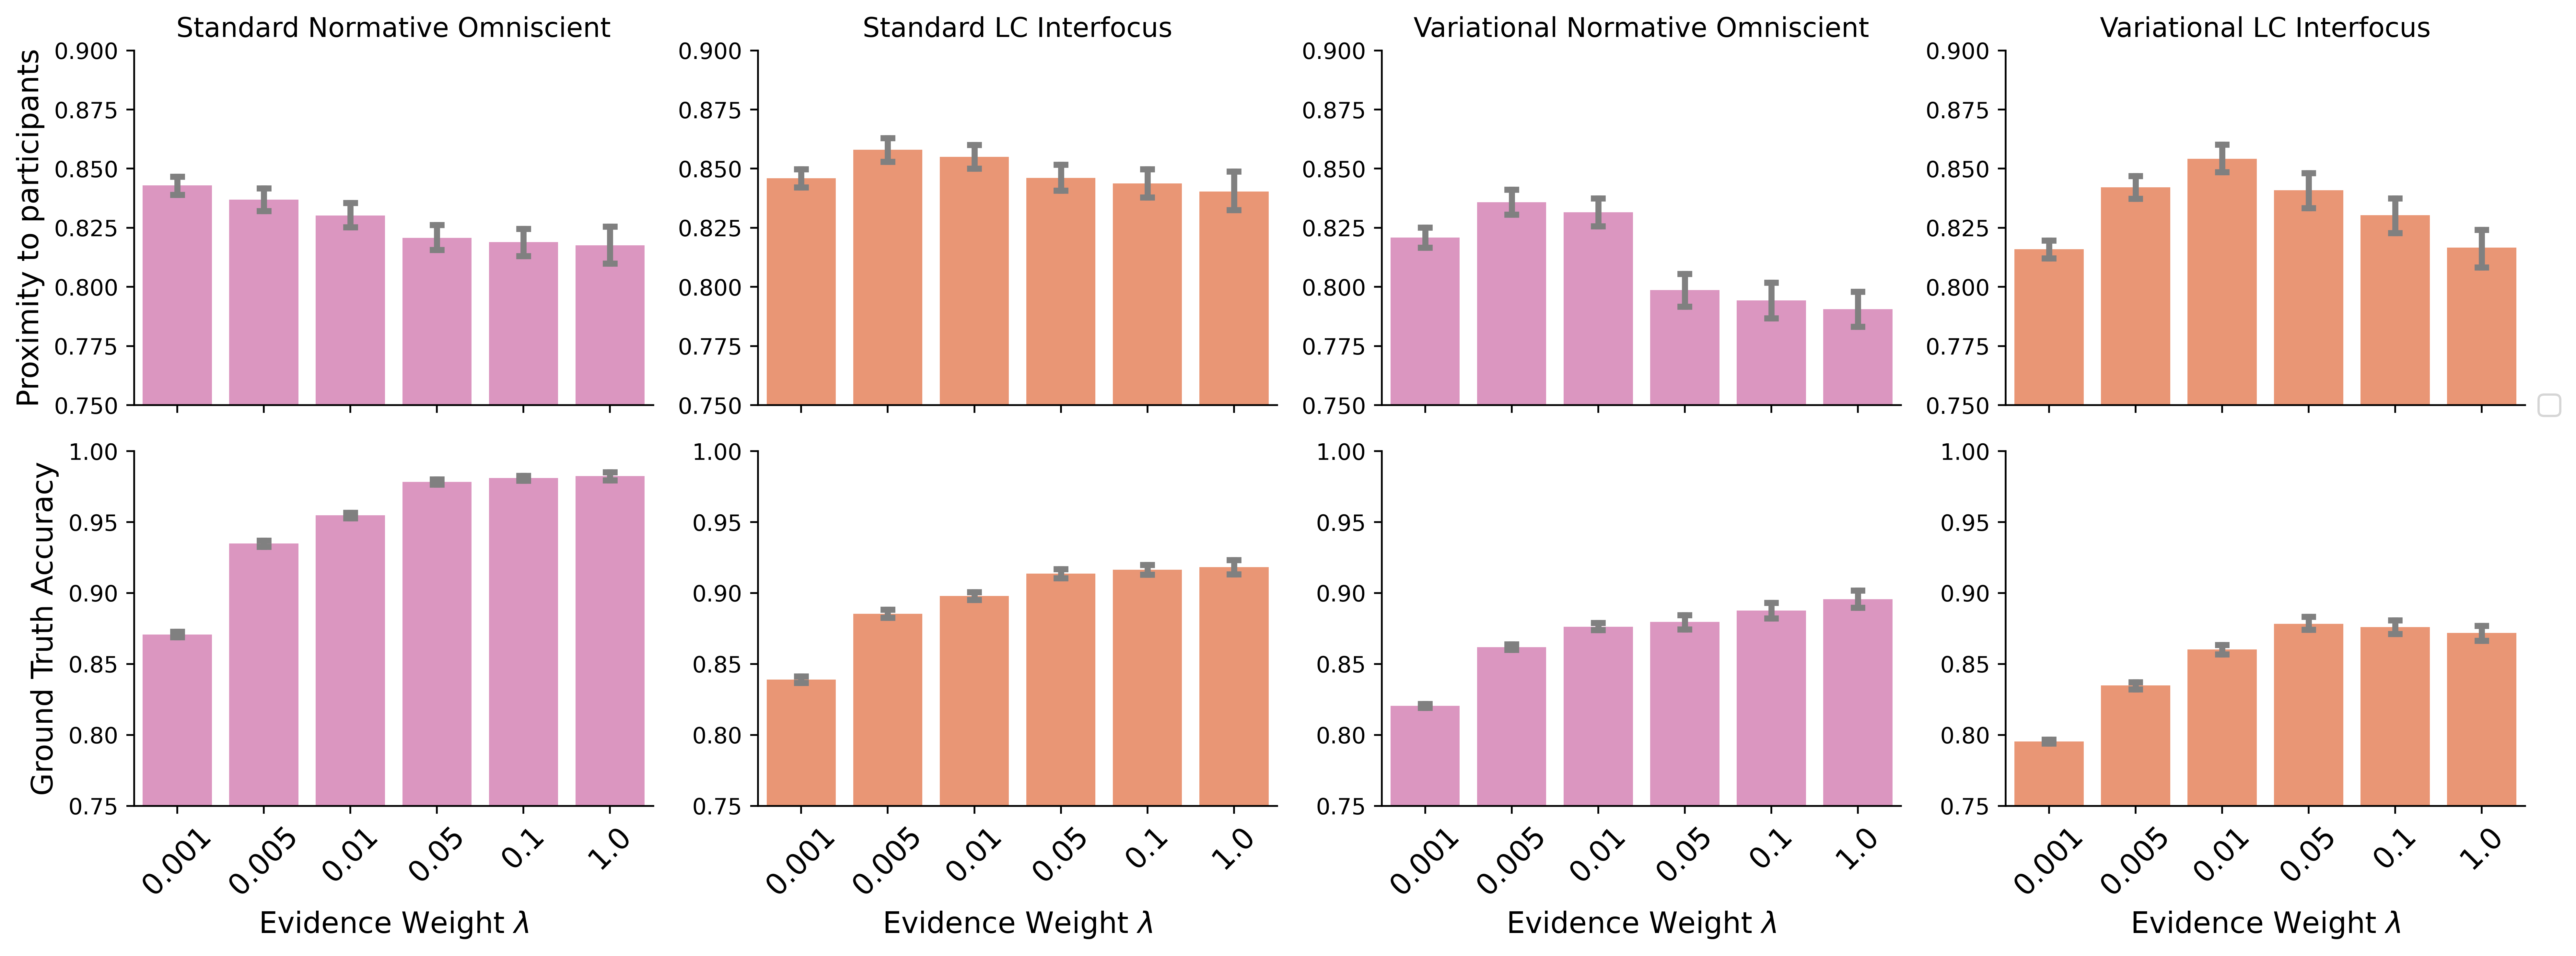

In [190]:
select_models = [
    *[f'normative_&_1_{evidence_w}' for evidence_w in evidence_weights],
    #*[f'LC_discrete_&_1_{evidence_w}' for evidence_w in evidence_weights],
    *[f'LC_discrete_att_&_att_{evidence_w}' for evidence_w in evidence_weights], 
    #*[f'full_normative_{evidence_w}' for evidence_w in evidence_weights], 
    #*[f'full_local_computations_{evidence_w}' for evidence_w in evidence_weights],
    *[f'omniscient_normative_{evidence_w}' for evidence_w in evidence_weights], 
    #*[f'omniscient_local_computations_{evidence_w}' for evidence_w in evidence_weights],
    #*[f'single_variable_normative_{evidence_w}' for evidence_w in evidence_weights],
    *[f'single_variable_local_computations_{evidence_w}' for evidence_w in evidence_weights],
]

select_models_names = {
    **{f'normative_&_1_{evidence_w}': f'Normative {evidence_w}' for evidence_w in evidence_weights},
    #**{f'LC_discrete_&_1_{evidence_w}': f'LC {evidence_w}' for evidence_w in evidence_weights},
    **{f'LC_discrete_att_&_att_{evidence_w}': f'LC Inters. {evidence_w}' for evidence_w in evidence_weights}, 
    #**{f'full_normative_{evidence_w}': f'Variational Normative Full Updates Inter. {evidence_w}' for evidence_w in evidence_weights},
    #**{f'full_local_computations_{evidence_w}': f'Variational LC Full Updates Inter. {evidence_w}' for evidence_w in evidence_weights},
    **{f'omniscient_normative_{evidence_w}': f'Variational Normative {evidence_w}' for evidence_w in evidence_weights}, 
    #**{f'omniscient_local_computations_{evidence_w}': f'Variational LC {evidence_w}' for evidence_w in evidence_weights},
    #**{f'single_variable_normative_{evidence_w}': f'Variational Normative Single Var. Inter. {evidence_w}' for evidence_w in evidence_weights},
    **{f'single_variable_local_computations_{evidence_w}': f'Variational LC Single Var. Inter. {evidence_w}' for evidence_w in evidence_weights},
    
}
select_models_names_noweight = {
    **{f'normative_&_1_{evidence_w}': f'Normative' for evidence_w in evidence_weights},
    #**{f'LC_discrete_&_1_{evidence_w}': f'LC' for evidence_w in evidence_weights},
    **{f'LC_discrete_att_&_att_{evidence_w}': f'LC Inters.' for evidence_w in evidence_weights}, 
    #**{f'full_normative_{evidence_w}': f'Variational Normative Full Updates Inter.' for evidence_w in evidence_weights},
    #**{f'full_local_computations_{evidence_w}': f'Variational LC Full Updates Inter.' for evidence_w in evidence_weights},
    **{f'omniscient_normative_{evidence_w}': f'Variational Normative' for evidence_w in evidence_weights}, 
    #**{f'omniscient_local_computations_{evidence_w}': f'Variational LC' for evidence_w in evidence_weights},
    #**{f'single_variable_normative_{evidence_w}': f'Variational Normative Single Var. Inter.' for evidence_w in evidence_weights},
    **{f'single_variable_local_computations_{evidence_w}': f'Variational LC Single Var. Inter.' for evidence_w in evidence_weights},
    
}

colors_loc = [colors[0], colors[2], colors[0], colors[2]]
select_models_labels = [v for v in select_models_names.values()]
select_models_labels_noweight = pd.Series([v for v in select_models_names_noweight.values()]).unique()


col_features = select_models_labels_noweight
col_labels = ['Standard Normative Omniscient', 'Standard LC Interfocus', 'Variational Normative Omniscient', 'Variational LC Interfocus']
col_name = 'model_labels_noweight'
row_features = ['judgement_to_weighted_MAP', 'accuracy_weighted']
row_labels = ["Proximity to participants", "Ground Truth Accuracy"]

#colors = get_colors(np.sort(df_gen.model_labels_noweight.unique()), select_models_labels_noweight, palette)
#colors = get_colors(np.sort(df_gen.model_labels_noweight.unique()), select_models_labels_noweight.tolist(), palette)

#sns.set_palette(colors)
fig, axs = plt.subplots(len(row_features), len(col_features), figsize=(16, 6), dpi=500, sharex=True)

for i, row in enumerate(row_features):
    for j, col in enumerate(col_features):
        #colors = get_colors(np.sort(df_ccn.model.unique()), ccn_models, palette)
        
        #sns.set_palette(colors)

        df_plot_w = df_gen[df_gen[col_name] == col]
        df_plot = df_plot_w[df_plot_w.evidence_weight.isin([0.001, 0.005, 0.01, 0.05, 0.1, 1])]
        df_plot = df_plot.rename({'model_factorisation':'Factorisation'}, axis=1)
        df_plot = df_plot.rename({'model_focus':'Focus'}, axis=1)

    
        sns.barplot(x='evidence_weight', y=row, data=df_plot, ax=axs[i, j], color=colors_loc[j], ci=95, capsize=.1, errcolor=".5")

        
        if i < len(row_features) - 1:
            axs[i, j].set_xticklabels([], rotation=90)
            axs[i, j].set_xlabel("", rotation=90)
            axs[i, j].set_title(f'{col_labels[j]}', fontsize=12)
            #axs[i, j].legend(fontsize=11)
            axs[i, j].set_ylim(.75, .9) 
        else:
            axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), fontsize=13, rotation=45)
            axs[i, j].set_xlabel(r"Evidence Weight $\lambda$", fontsize=13)
            axs[i, j].set_title('')  
            axs[i, j].set_ylim(.75, 1)          

        if j == 0:
            axs[i, j].set_ylabel(row_labels[i], fontsize=13)
        else:
            axs[i, j].set_ylabel("")

        if j == len(col_features) - 1 and i == 0:
            axs[i, j].legend(labelspacing=1, loc=6, bbox_to_anchor=(1, 0), fontsize=12)
        else:
            axs[i, j].legend([], frameon=False)

        

        sns.despine(ax=axs[i,j])
        

plt.tight_layout()
plt.savefig('./plots/lambda_accuracy_results.pdf', format='pdf')
plt.savefig('./plots/lambda_accuracy_results.png', format='png')
plt.show()

## Next

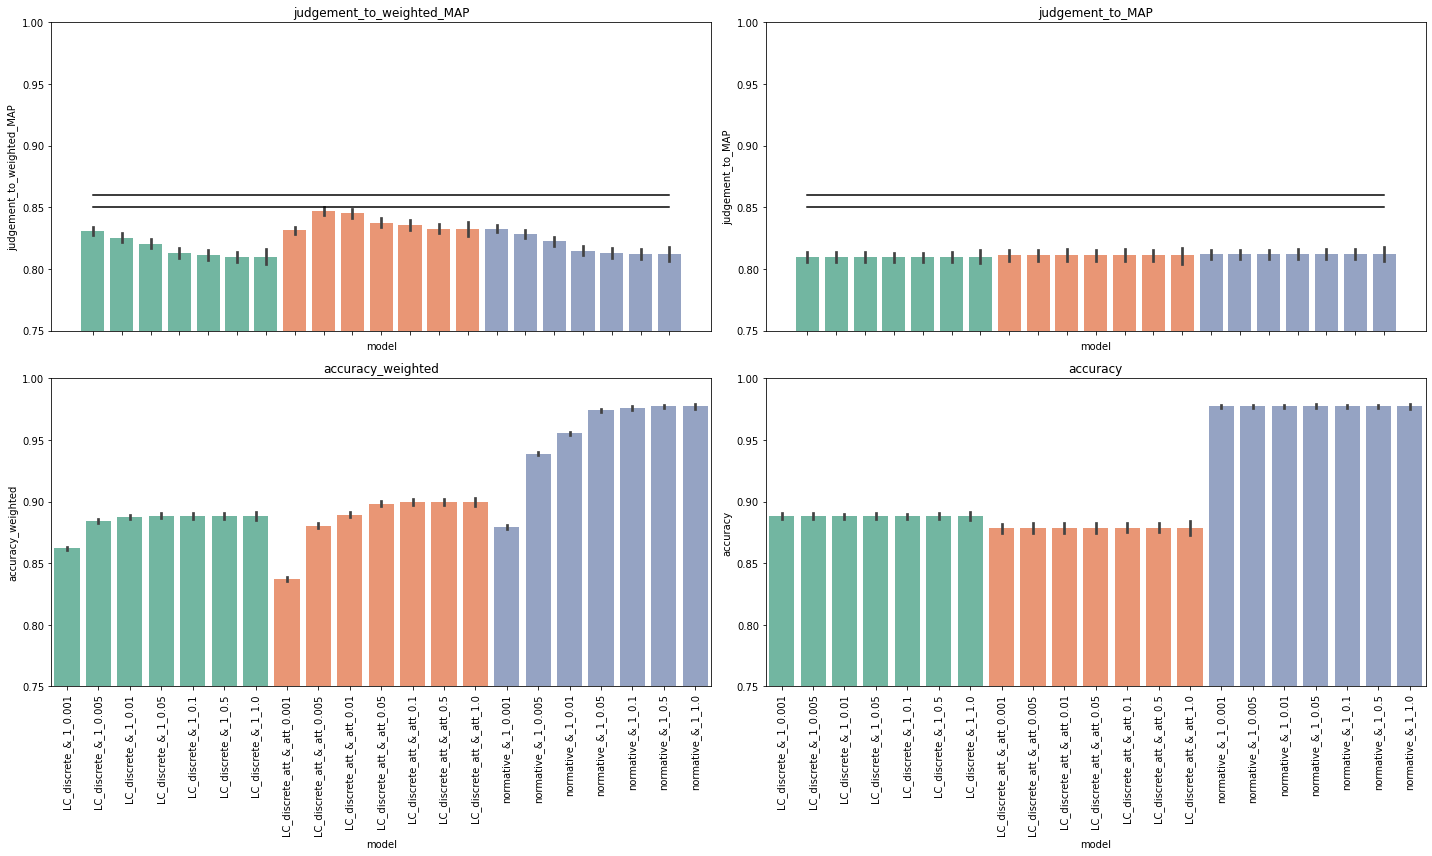

In [109]:
features = [['judgement_to_weighted_MAP', 'judgement_to_MAP'], ['accuracy_weighted', 'accuracy']]


fig, axs = plt.subplots(len(features), len(features[0]), figsize=(20, 12))

for i, rows in enumerate(features):
    for j, feature in enumerate(rows):
        colors = get_colors(np.sort(df_classic_gen.model.unique()), models_classic, palette)
        sns.set_palette(colors)

        sns.barplot(x='model', y=feature, data=df_classic, ax=axs[i, j], order=np.sort(df_classic_gen.model.unique()))

        if i < len(features) - 1:
            axs[i, j].set_xticklabels([], rotation=90)
        else:
            axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), rotation=90)
        axs[i, j].set_ylim(.75, 1)
        axs[i, j].set_title(feature)
        
        if i == 0:
            sns.lineplot(x=np.arange(axs[i,j].get_xticks().size), y=0.85*np.ones(axs[i,j].get_xticks().size), ax=axs[i, j], color='black')
            sns.lineplot(x=np.arange(axs[i,j].get_xticks().size), y=0.86*np.ones(axs[i,j].get_xticks().size), ax=axs[i, j], color='black')


plt.tight_layout()
plt.show()

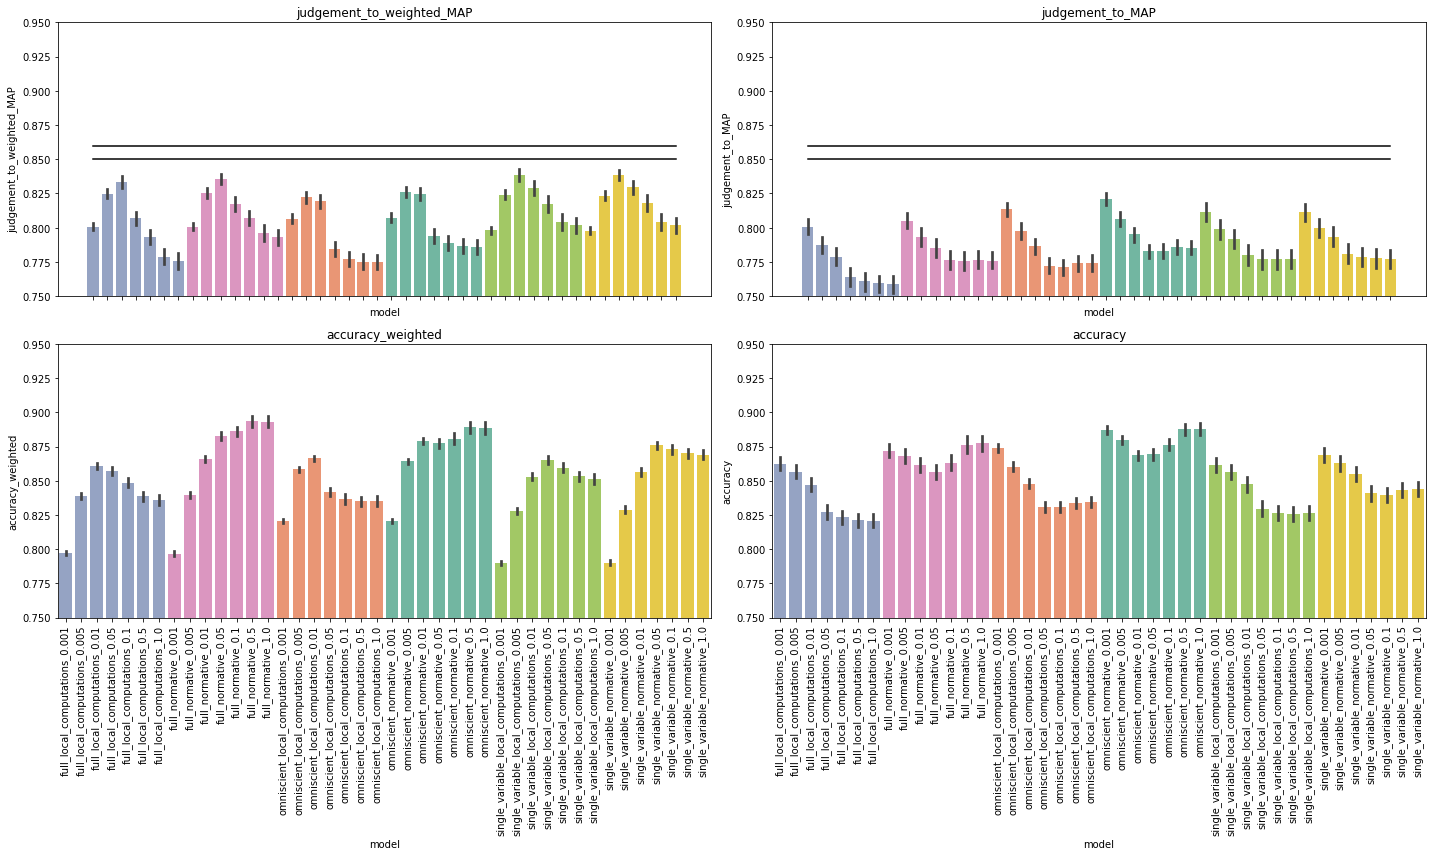

In [110]:
features = [['judgement_to_weighted_MAP', 'judgement_to_MAP'], ['accuracy_weighted', 'accuracy']]


fig, axs = plt.subplots(len(features), len(features[0]), figsize=(20, 12))

for i, rows in enumerate(features):
    for j, feature in enumerate(rows):
        colors = get_colors(np.sort(df_vis_gen.model.unique()), models_vis, palette)
        sns.set_palette(colors)

        sns.barplot(x='model', y=feature, data=df_vis, ax=axs[i, j], order=np.sort(df_vis.model.unique()))

        if i < len(features) - 1:
            axs[i, j].set_xticklabels([], rotation=90)
        else:
            axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), rotation=90)
        axs[i, j].set_ylim(.75, .95)
        axs[i, j].set_title(feature)

        if i == 0:
            sns.lineplot(x=np.arange(axs[i,j].get_xticks().size), y=0.85*np.ones(axs[i,j].get_xticks().size), ax=axs[i, j], color='black')
            sns.lineplot(x=np.arange(axs[i,j].get_xticks().size), y=0.86*np.ones(axs[i,j].get_xticks().size), ax=axs[i, j], color='black')
plt.tight_layout()
plt.show()

0.43191964285714285


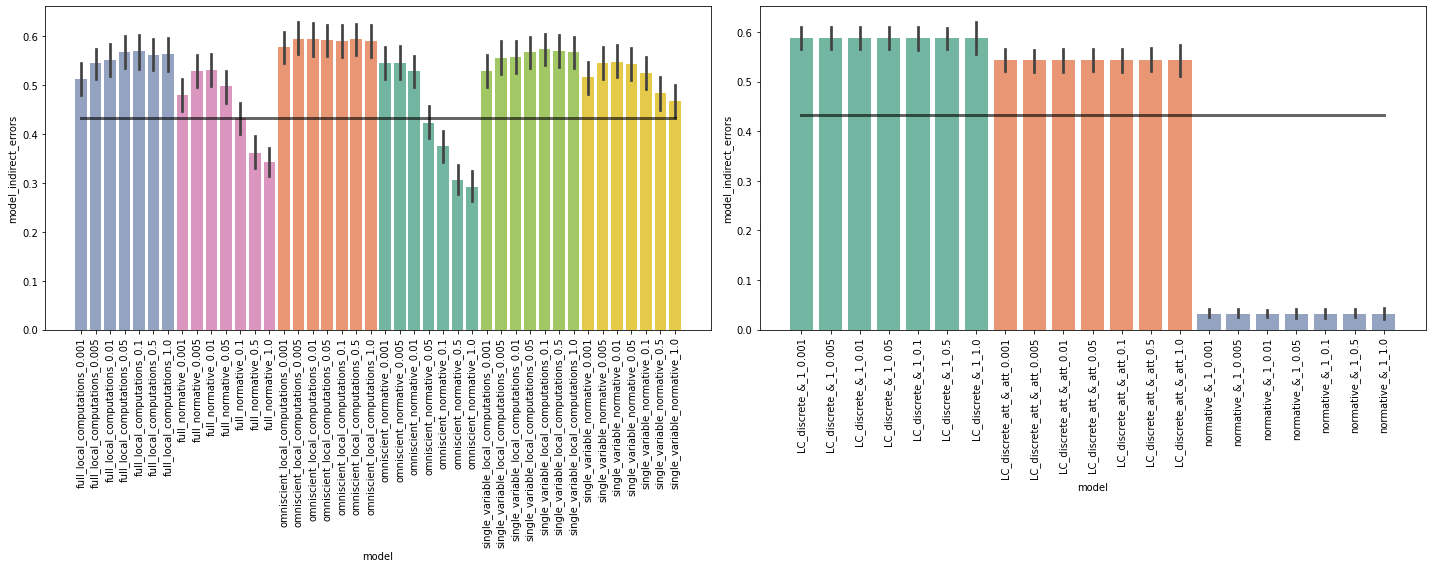

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

part_indirect_errors = df_vis_gen[df_vis_gen.model == df_vis.model.unique()[0]].part_indirect_errors.mean()
print(part_indirect_errors)
colors = get_colors(np.sort(df_vis_gen.model.unique()), models_vis, palette)
sns.set_palette(colors)
sns.barplot(x='model', y='model_indirect_errors', data=df_vis_gen, order=np.sort(df_vis_gen.model.unique()), ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
sns.lineplot(x=np.arange(df_vis.model.unique().size), y=part_indirect_errors*np.ones(df_vis.model.unique().size), ax=axs[0], linewidth=3, color='black', alpha=0.6)


colors = get_colors(np.sort(df_classic_gen.model.unique()), models_classic, palette)
sns.set_palette(colors)
sns.barplot(x='model', y='model_indirect_errors', data=df_classic_gen, order=np.sort(df_classic_gen.model.unique()), ax=axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
sns.lineplot(x=np.arange(df_classic_gen.model.unique().size), y=part_indirect_errors*np.ones(df_classic_gen.model.unique().size), ax=axs[1], linewidth=3, color='black', alpha=0.6)

plt.tight_layout()
plt.show()

In [50]:
df_summary = pd.DataFrame(columns=['judgement_to_weighted_MAP', 'judgement_to_MAP'])
df_summary['judgement_to_weighted_MAP']=df_vis_gen.groupby('model').judgement_to_weighted_MAP.mean()#.to_list()
df_summary['judgement_to_MAP']= df_vis_gen.groupby('model').judgement_to_MAP.mean().to_list()
df_summary['accuracy_weighted'] = df_vis_gen.groupby('model').accuracy_weighted.mean().to_list()
df_summary['accuracy'] = df_vis_gen.groupby('model').accuracy.mean().to_list()

print('LC_attention:', df_lc_att_gen.judgement_to_weighted_MAP.mean(), df_lc_att_gen.judgement_to_MAP.mean())
print('LC:', df_lc_gen.judgement_to_weighted_MAP.mean(), df_lc_gen.judgement_to_MAP.mean())
print('Normative:',df_normative_gen.judgement_to_weighted_MAP.mean(), df_normative_gen.judgement_to_MAP.mean())

df_summary



LC_attention: 0.8406915267019651 0.8190607977038549
LC: 0.8188262174235809 0.8186407130216079
Normative: 0.8176617112586398 0.8175068752631354


,judgement_to_weighted_MAP,judgement_to_MAP,accuracy_weighted,accuracy
model,,,,
full_local_computations_0.001,0.817600,0.816246,0.800377,0.869321
full_local_computations_0.005,0.841148,0.801181,0.841127,0.866096
full_local_computations_0.01,0.846869,0.791370,0.861648,0.856081
full_local_computations_0.05,0.816870,0.774685,0.860231,0.834117
full_local_computations_0.1,0.804300,0.771214,0.855033,0.830763
full_local_computations_0.5,0.791279,0.770667,0.847968,0.829394
full_local_computations_1.0,0.788021,0.769802,0.846023,0.829233
full_normative_0.001,0.817442,0.819727,0.800085,0.878971
full_normative_0.005,0.841203,0.807020,0.842428,0.877982


## Comparison metrics

- Distance to judgement
- Number of indirect errors
- BIC

## Short paper

Comparison for all model where evidence weight is 1, weighted accuracy, weighted distance to participant
For each structure: chain, collider, common cause, confound, dampened
Provide average graph for chain?

In [67]:
with open('./data/database.obj', 'rb') as inFile:
    exp = pickle.load(inFile)

chains_graph = exp.models[exp.models.type == 'chain']
columns = ['pid', 'experiment', 'trial_type', 'sign', 'type', 'num', 'one>>two', 'one>>three',
            'two>>one', 'two>>three', 'three>>one', 'three>>two']

link_cols = ['one>>two', 'one>>three', 'two>>one', 'two>>three', 'three>>one', 'three>>two']
chains_graph = chains_graph[columns]


chains_graph['utid'] = chains_graph.index.to_list()

chains_graph_pos = chains_graph[chains_graph.sign == 'pos']

chains_graph_pos['utid'] = chains_graph_pos.index.to_list()

chain_trials = exp.df_trials[exp.df_trials.trial_name == 'chain']
chain_trials_pos = chain_trials[chain_trials.trial_spec == 'pos']

chain_pos = chains_graph_pos.merge(chain_trials_pos, on='utid')
chain = chains_graph.merge(chain_trials, on='utid')

C:\Users\vbtes\AppData\Local\Temp/ipykernel_32100/1460504241.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chains_graph_pos['utid'] = chains_graph_pos.index.to_list()


In [57]:
chain_pos.head(5)

,pid_x,experiment_x,trial_type_x,sign,type,num,one>>two,one>>three,two>>one,two>>three,three>>one,three>>two,utid,experiment_y,pid_y,trial_type_y,trial_name,trial_spec,accuracy,hamming,num_indirect_errors,num_indirect_links,priorTruth,priorISpost,cond_label,cond,cond_order,genCorr,posCorr,negCorr,weakCorr,stgCorr,weakPosCorr,stgPosCorr,weakNegCorr,stgNegCorr,nullCorr,nonNullCorr,inters,inters_real,sense,expect,variables,std_order,postOriginOrder,num_inter,intervened_time
0,56da8da8c5b248000ae2adaf,experiment_1,generic_2,pos,chain,3.0,1.0,0.5,0.0,0.5,0.0,0.5,1-56da8da8c5b248000ae2adaf-pos_chain_3-generic_2,experiment_1,56da8da8c5b248000ae2adaf,generic_2,chain,pos,0.851478,0.666667,1,1,NaN,NaN,NaN,0,NaN,0.5,1.0,NaN,NaN,0.5,NaN,0.5,NaN,NaN,0.5,1.0,NaN,NaN,NaN,NaN,NaN,one_two_three,Blue_Red_Green,4.0,0.688742
1,57e91ff08dcd2c00014bea18,experiment_1,generic_3,pos,chain,3.0,1.0,0.5,0.0,1.0,0.0,0.0,1-57e91ff08dcd2c00014bea18-pos_chain_3-generic_3,experiment_1,57e91ff08dcd2c00014bea18,generic_3,chain,pos,0.914251,0.833333,1,1,NaN,NaN,NaN,1,NaN,0.833333,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,0.75,1.0,NaN,NaN,NaN,NaN,NaN,one_two_three,Blue_Red_Green,7.0,0.519868
2,5999ad2a0ed7ae0001991b57,experiment_1,generic_2,pos,chain,3.0,1.0,0.5,0.0,0.5,0.0,0.0,1-5999ad2a0ed7ae0001991b57-pos_chain_3-generic_2,experiment_1,5999ad2a0ed7ae0001991b57,generic_2,chain,pos,0.878732,0.833333,1,1,NaN,NaN,NaN,0,NaN,0.666667,1.0,NaN,NaN,0.5,NaN,0.5,NaN,NaN,0.75,1.0,NaN,NaN,NaN,NaN,NaN,one_two_three,Blue_Red_Green,5.0,0.337748
3,5aead02c78b0060001e6b394,experiment_1,generic_3,pos,chain,3.0,-0.5,0.5,-0.5,0.5,-0.5,-0.5,1-5aead02c78b0060001e6b394-pos_chain_3-generic_3,experiment_1,5aead02c78b0060001e6b394,generic_3,chain,pos,0.679156,0.166667,1,1,NaN,NaN,NaN,1,NaN,0.0,0.5,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,one_two_three,Blue_Red_Green,5.0,0.072848
4,5bcdd6be25295a0001a71beb,experiment_1,generic_2,pos,chain,3.0,1.0,1.0,-0.5,1.0,0.0,-0.5,1-5bcdd6be25295a0001a71beb-pos_chain_3-generic_2,experiment_1,5bcdd6be25295a0001a71beb,generic_2,chain,pos,0.789958,0.5,1,1,NaN,NaN,NaN,0,NaN,0.5,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,0.25,1.0,NaN,NaN,NaN,NaN,NaN,one_two_three,Blue_Red_Green,10.0,0.513245


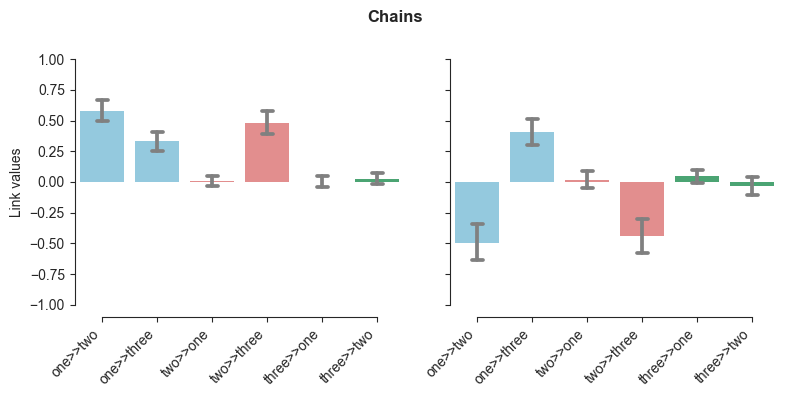

In [70]:
# Plot empirical priors
colors = ('skyblue', 'skyblue', 'lightcoral', 'lightcoral', 'mediumseagreen', 'mediumseagreen')

fig, axs = plt.subplots(1, 2, figsize=(8, 4), dpi= 100, facecolor='w', edgecolor='k', sharey=True)
sns.set_style('ticks')

fig.suptitle(f'Chains', weight='bold')

chains_melt = chain_pos[link_cols].melt()


sns.barplot(y=chains_melt.value, x=chains_melt.variable, data=chains_melt,  
            ci=95, capsize=.2, palette=colors, linewidth=0, errcolor=".5", ax=axs[0])
axs[0].set(xlabel=None, ylabel='Link values')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right', fontsize=10)
axs[0].set_ylim(top=1.1, bottom=-1.1)
sns.despine(trim=True, ax=axs[0])


chains_melt = chain[chain.sign == 'neg'][link_cols].melt()


sns.barplot(y=chains_melt.value, x=chains_melt.variable, data=chains_melt,  
            ci=95, capsize=.2, palette=colors, linewidth=0, errcolor=".5", ax=axs[1])
axs[1].set(xlabel=None, ylabel='Link values')
axs[1].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right', fontsize=10)
axs[1].set_ylim(top=1.1, bottom=-1.1)
sns.despine(trim=True, ax=axs[1])
axs[1].set_ylabel('')



plt.tight_layout()

Mean accuracy: 0.7973414270957538
Mean indirect error: 0.7679324894514767
1    182
0     55
Name: num_indirect_errors, dtype: int64
Mean accuracy for non indirect error: 0.768555491558326
Mean accuracy for one indirect error: 0.8060404735493711


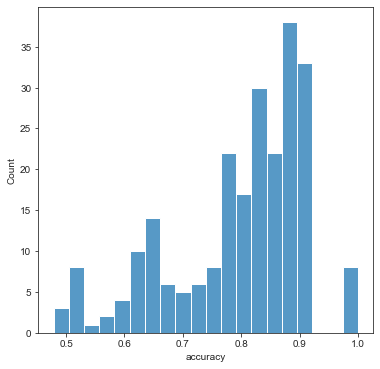

In [71]:


print(f'Mean accuracy: {chain_trials.accuracy.mean()}')
print(f'Mean indirect error: {chain_trials.num_indirect_errors.mean()}')

print(chain_trials.num_indirect_errors.value_counts())

print(f'Mean accuracy for non indirect error: {chain_trials[chain_trials.num_indirect_errors == 0].accuracy.mean()}')
print(f'Mean accuracy for one indirect error: {chain_trials[chain_trials.num_indirect_errors == 1].accuracy.mean()}')
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

sns.histplot(data=chain_trials, x='accuracy', ax=ax, bins=20)

plt.show()

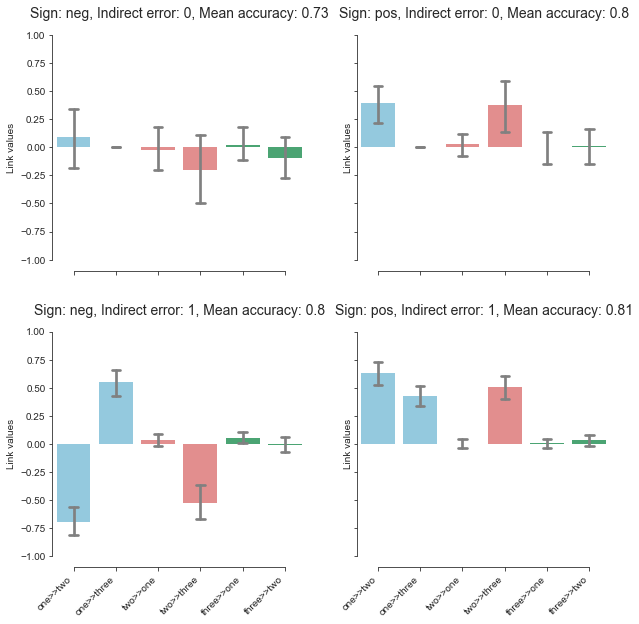

In [87]:
signs = ['neg', 'pos']
errors = [0, 1]

fig, axs = plt.subplots(len(signs), len(errors), figsize=(10, 10), sharex=True, sharey=True)

for i, sign in enumerate(signs):
    for j, error in enumerate(errors):
        df_sign = chain[chain.sign == sign]
        df_error = df_sign[df_sign.num_indirect_errors == error]

        df_melt = df_error[link_cols].melt()

        
        sns.barplot(y=df_melt.value, x=df_melt.variable, data=df_melt,  
                    ci=95, capsize=.2, palette=colors, linewidth=0, errcolor=".5", ax=axs[j, i])
        axs[j, i].set(xlabel=None, ylabel='Link values')
        axs[j, i].set_xticklabels(axs[j, i].get_xticklabels(), rotation=45, ha='right', fontsize=10)
        axs[j, i].set_ylim(top=1.1, bottom=-1.1)
        sns.despine(trim=True, ax=axs[j, i])

        axs[j, i].set_title(f'Sign: {sign}, Indirect error: {error}, Mean accuracy: {np.round(df_error.accuracy.mean(), 2)}', fontsize=14)